In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'customer_data.csv')

In [3]:
df.shape

(500, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Email Address          500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Location               500 non-null    object 
 5   Income                 500 non-null    int64  
 6   Occupation             500 non-null    object 
 7   Purchase Date          500 non-null    object 
 8   Laptop Brands          500 non-null    object 
 9   Price                  500 non-null    float64
 10  Frequency of Use       500 non-null    object 
 11  Purpose                500 non-null    object 
 12  Previous Brands Owned  500 non-null    object 
 13  Satisfaction Rating    500 non-null    int64  
 14  Tech Knowledge Level   500 non-null    object 
 15  Cart A

In [5]:
df.describe()

,Customer ID,Age,Income,Price,Satisfaction Rating
count,5.000000e+02,500.000000,500.000000,500.000000,500.0000
mean,5.699720e+07,44.124000,92711.418000,1168.010906,2.9300
std,2.575778e+07,15.619236,71373.239589,470.105761,1.4287
min,1.020169e+07,18.000000,35062.000000,304.607129,1.0000
25%,3.552315e+07,31.000000,42426.000000,780.213313,2.0000
50%,5.770813e+07,45.000000,60002.000000,1156.913887,3.0000
75%,8.026847e+07,57.000000,124516.000000,1578.803060,4.0000
max,9.966980e+07,70.000000,299672.000000,1987.973492,5.0000


In [6]:
df.head()

,Customer ID,Name,Email Address,Age,Location,Income,Occupation,Purchase Date,Laptop Brands,Price,Frequency of Use,Purpose,Previous Brands Owned,Satisfaction Rating,Tech Knowledge Level,Cart Abandonment
0,70650431,John Tyler,ehaley@example.com,25,Big City,169470,Unemployed/Unskilled,11/26/2022,Asus,1416.844321,Daily,Gaming,Hard.,1,Expert,Yes
1,38417808,Ana Johnson,hendersonmaria@example.org,43,Big City,285743,Management/self-employed/highly qualified empl...,8/14/2022,Asus,642.781762,Rarely,Work,Actually assume.,1,Advanced,No
2,32731807,Steven Smith,johndavis@example.net,50,Midsize-City,54796,Management/self-employed/highly qualified empl...,3/2/2023,Apple,1593.556018,Rarely,Entertainment,Step.,5,Beginner,No
3,68748371,Amy Brown,ocobb@example.net,68,Big City,148493,Skilled Employee/official,4/30/2020,Dell,866.486924,Rarely,Gaming,Green in.,1,Intermediate,No
4,45107711,Chad Romero,teresa82@example.org,66,Small City,43043,Unemployed/Unskilled,5/14/2021,Lenovo,1177.699519,Daily,Gaming,Nation.,3,Beginner,Yes


In [7]:
df['Price'] = df['Price'].round(2)

In [8]:
df.tail()

,Customer ID,Name,Email Address,Age,Location,Income,Occupation,Purchase Date,Laptop Brands,Price,Frequency of Use,Purpose,Previous Brands Owned,Satisfaction Rating,Tech Knowledge Level,Cart Abandonment
495,69696301,Michael Silva,ilopez@example.com,44,Big City,186177,Skilled Employee/official,12/27/2020,HP,1951.56,Rarely,Work,Close.,4,Beginner,Yes
496,98327473,Timothy Johnson,rchaney@example.org,34,Midsize-City,61086,Skilled Employee/official,5/16/2021,HP,966.17,Weekly,Work,Truth particularly.,2,Intermediate,Yes
497,60647312,Miss Brooke Lopez,adamsjose@example.net,68,Small City,40011,Skilled Employee/official,10/2/2019,Acer,1515.82,Weekly,Gaming,Day.,5,Advanced,No
498,68589349,Bethany Johnson,xmoore@example.com,45,Big City,214533,Unemployed/Unskilled,10/2/2021,Asus,529.17,Rarely,Gaming,Include.,3,Advanced,Yes
499,61768894,John Young,jeffreyholmes@example.org,60,Small City,38820,Management/self-employed/highly qualified empl...,2/19/2020,Asus,846.22,Weekly,Gaming,Wide.,1,Beginner,No


In [9]:
df['Laptop Brands'].value_counts()

Laptop Brands
HP        97
Apple     83
Acer      83
Asus      80
Dell      80
Lenovo    77
Name: count, dtype: int64

In [10]:
# Group by a column and calculate the mean
grouped_data = df.groupby('Location')['Age'].mean()
grouped_data

Location
Big City        43.281437
Midsize-City    45.270115
Small City      43.754717
Name: Age, dtype: float64

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


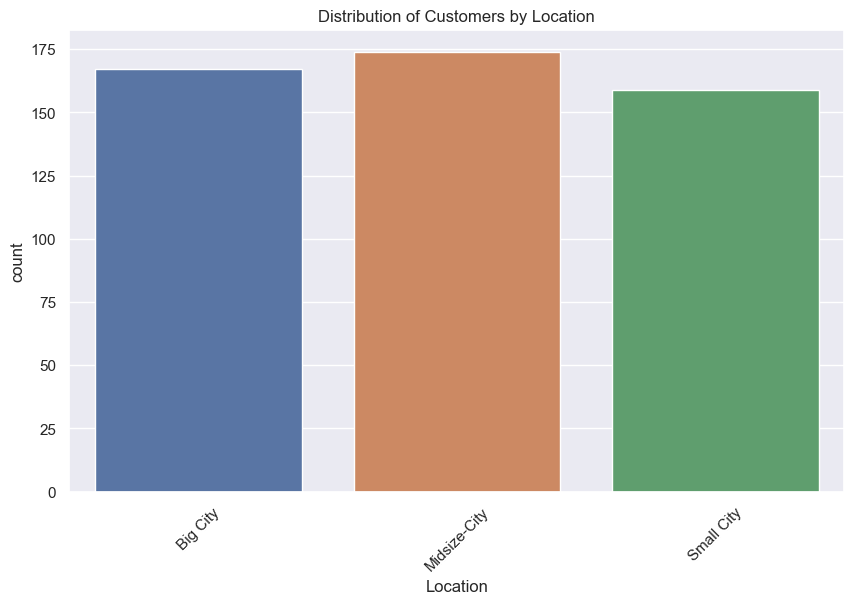

In [11]:

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location')
plt.xticks(rotation=45)
plt.title('Distribution of Customers by Location')
plt.show()


In [12]:
# Use the 'value_counts()' function to count the occurrences of each laptop brand
laptop_brand_counts = df['Laptop Brands'].value_counts()

# Get the top ten selling laptop brands
top_10_laptop_brands = laptop_brand_counts.head(10)

print(top_10_laptop_brands)


Laptop Brands
HP        97
Apple     83
Acer      83
Asus      80
Dell      80
Lenovo    77
Name: count, dtype: int64


c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


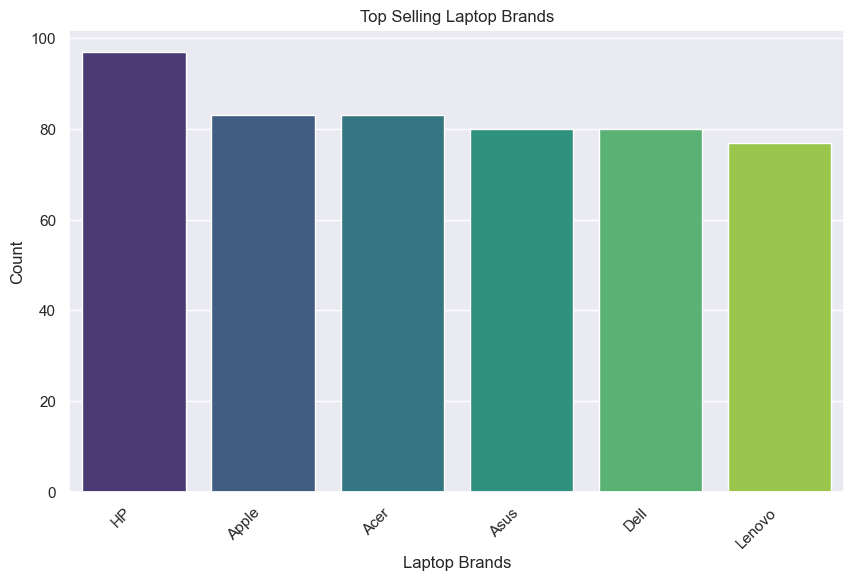

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_laptop_brands.index, y=top_10_laptop_brands.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Laptop Brands")
plt.ylabel("Count")
plt.title("Top Selling Laptop Brands")
plt.show()

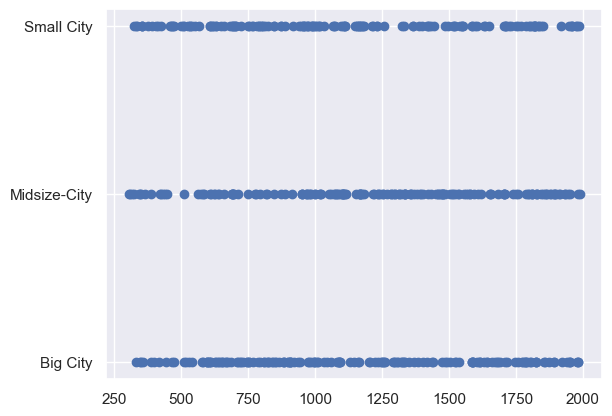

In [14]:
plt.scatter(df['Price'], df['Location'])
plt.show()

In [15]:
occupation=df['Occupation'].value_counts()

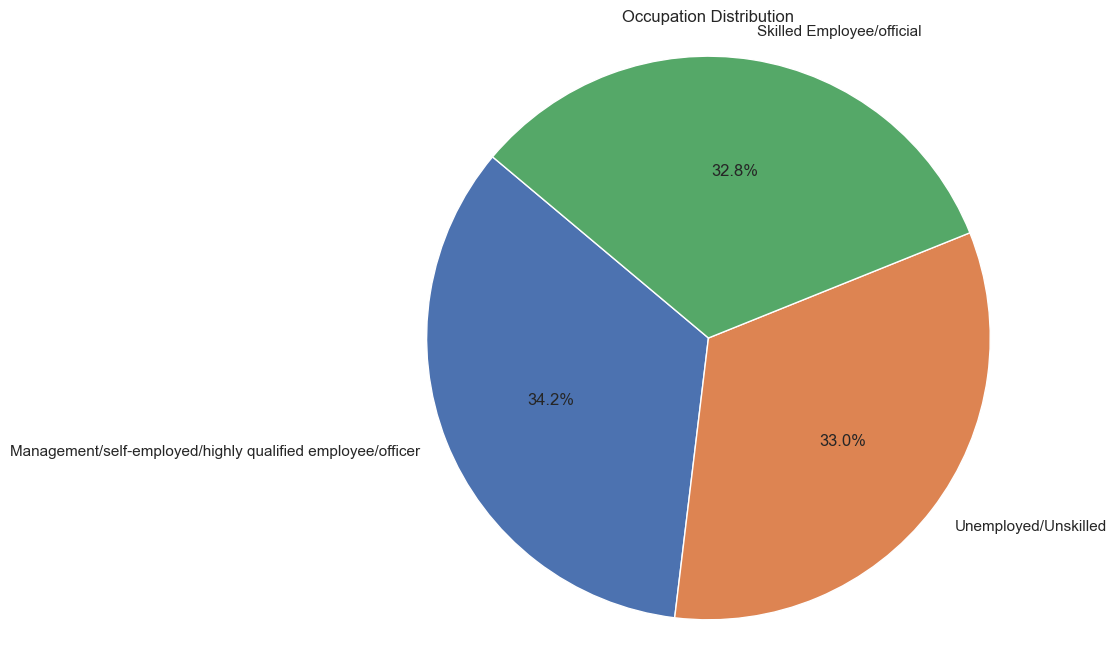

In [16]:
occupation_counts = df['Occupation'].value_counts()

# Create a pie chart with labels
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()